In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from Definitions import *

In [3]:
def LxCat_Extract(file_path):
    with open(file_path) as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    X = []
    Y = []
    for q in range(0,len(content)):
        if content[q].find('-----------------------------') == 0:
            File_Length = len(content)
            Start_index = q+1
    for w in range(Start_index,File_Length):
        x,y = content[w].split()
        X.append(float(x))
        Y.append(float(y)*1e20)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y


In [7]:
###########################
#########
#########ELASTIC MOMENTUM TRANSFER, ELASTIC TOTAL, ELASTIC ANGULAR +DISTRIBUTION ( EPSILON)
######### Importing the cross sections
###########################

LOC = "/Users/austinmcdonald/Documents/GasMixXeHeAr/X-section-calcs/"
EMT = np.load(LOC+"ELASTIC_MOMENTUM_TRANSFER.npy")
ET  = np.load(LOC+"ELASTIC_TOTAL.npy")
EA  = np.load(LOC+"ELASTIC_ANGULAR.npy")

In [8]:
Hayashi    = "Hayashi.txt"
Biagi      = "Biagi.txt"
McEachran  = "McEachran-Stauffer.txt"
Puech      = "Puech-Mizzi.txt"
Zatsarinny = "Zatsarinny-Bartschat.txt"

In [9]:
HaX,HaY = LxCat_Extract(LOC+Hayashi)
BiX,BiY = LxCat_Extract(LOC+Biagi)
McX,McY = LxCat_Extract(LOC+McEachran)
PuX,PuY = LxCat_Extract(LOC+Puech)
ZaX,ZaY = LxCat_Extract(LOC+Zatsarinny)

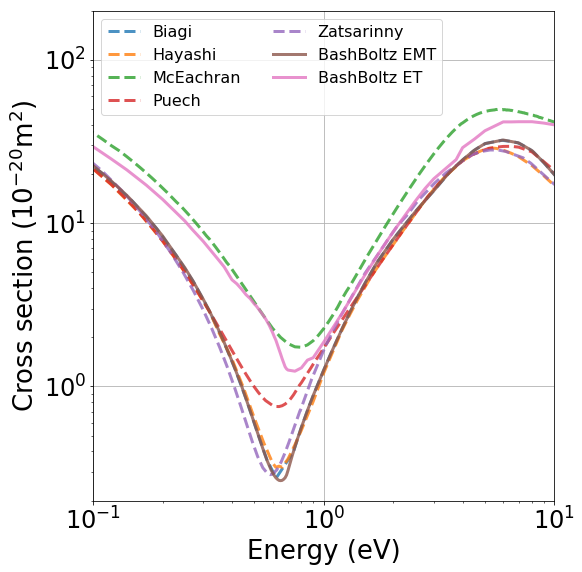

In [10]:
plt.figure(figsize=(8,8))
plt.plot(BiX,BiY,linewidth=3,linestyle='--',alpha=0.8,label="Biagi")
plt.plot(HaX,HaY,linewidth=3,linestyle='--',alpha=0.8,label="Hayashi")
plt.plot(McX,McY,linewidth=3,linestyle='--',alpha=0.8,label="McEachran")
plt.plot(PuX,PuY,linewidth=3,linestyle='--',alpha=0.8,label="Puech")
plt.plot(ZaX,ZaY,linewidth=3,linestyle='--',alpha=0.8,label="Zatsarinny")

plt.plot(EMT[0],EMT[1],linewidth=3,alpha=0.8,label="BashBoltz EMT")
plt.plot(ET[0],ET[1],linewidth=3,alpha=0.8,label="BashBoltz ET")

plt.legend(loc='upper left',fontsize=16,ncol=2)

plt.xlabel(r'Energy (eV)',fontsize=26)
plt.ylabel(r'Cross section (10$^{-20}$m$^2$)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.xlim(1e-3,1e3)
plt.xlim(1e-1,1e1)
plt.ylim(2e-1,2e2)
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/MB-vel"+".pdf")

plt.show()

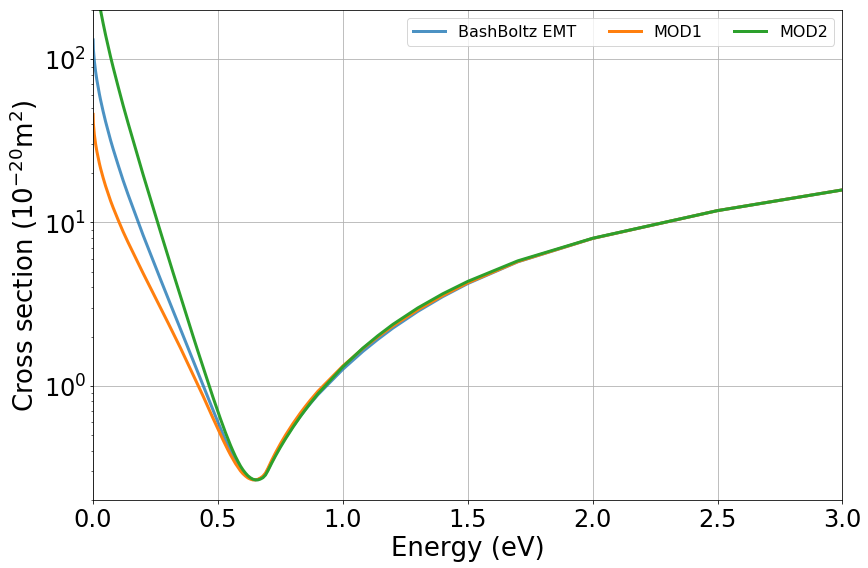

In [52]:
plt.figure(figsize=(12,8))

plt.plot(EMT[0],EMT[1],linewidth=3,alpha=0.8,label="BashBoltz EMT")

def expand(X,A,B,C,Org):
    Y = A+ B*(X-Org) + C*(X-Org)**2
    Y = Y*np.exp(-(X)**2/0.5)
    return Y+1


#Keep
Ynew = EMT[1]*expand(EMT[0],0,1,0,0.65)
plt.plot(EMT[0],Ynew,label="MOD1",linewidth=3)

#Keep
Ynew = EMT[1]*expand(EMT[0],0,-1,5,0.65)
plt.plot(EMT[0],Ynew,label="MOD2",linewidth=3)

plt.legend(loc='upper right',fontsize=16,ncol=3)

plt.xlabel(r'Energy (eV)',fontsize=26)
plt.ylabel(r'Cross section (10$^{-20}$m$^2$)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.tight_layout()
plt.semilogy()
plt.xlim(0,3)
#plt.xlim(1e-1,1e1)
plt.ylim(2e-1,2e2)
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/MB-vel"+".pdf")
plt.show()

In [ ]:
###########################
#########         This is how I saved the MB data to .npy files
###########################
#########
#########Here are the values form magbolts for the xenon X section
#########
###########################
# ELASTIC MOMENTUM TRANSFER
XEN=[0.00,.001,.005,.007,0.01,.015,0.02,.025,0.03,0.04,0.05,0.06,0.07,0.08,0.10,0.12,0.14,0.17,0.20,0.25,0.27,0.30,0.32,0.35,0.37,0.40,0.42,0.44,0.46,0.48,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,.715,0.73,0.75,0.77,0.80,0.83,0.85,0.87,0.90,1.00,1.08,1.14,1.20,1.30,1.40,1.50,1.70,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,8.00,9.00,10.0,12.0,15.0,18.0,20.0,25.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.,125.,150.,200.,250.,300.,400.,500.,600.,700.,800.,1000.,1500.,2000.,3000.,4000.,5000.,6000.,8000.,1.0e4,1.5e4,2.0e4,3.0e4,4.0e4,5.0e4,6.0e4,8.0e4,1.0e5,1.25e5,1.5e5,1.75e5,2.0e5,2.5e5,3.0e5,3.5e5,4.0e5,4.5e5,5.0e5,6.0e5,7.0e5,8.0e5,9.0e5,1.0e6,1.25e6,1.5e6,1.75e6,2.0e6,2.5e6,3.0e6,3.5e6,4.0e6,4.5e6,5.0e6,6.0e6,7.0e6,8.0e6,9.0e6,1.0e7,1.25e7,1.5e7,1.75e7,2.0e7,2.5e7,3.0e7,3.5e7,4.0e7,4.5e7,5.0e7,6.0e7,7.0e7,8.0e7,9.0e7,1.0e8,1.25e8,1.5e8,1.75e8,2.0e8,2.5e8,3.0e8,3.5e8,4.0e8,4.5e8,5.0e8,6.0e8,7.0e8,8.0e8,9.0e8,1.0e9]
YMOM=[131.,115.,97.0,91.1,83.9,74.6,67.3,61.2,56.1,47.9,41.4,36.2,31.8,28.2,22.5,18.1,14.8,11.1,8.36,5.33,4.47,3.43,2.88,2.22,1.86,1.43,1.20,1.01,.844,.708,.596,.548,.504,.465,.430,.399,.372,.348,.328,.310,.296,.285,.276,.270,.266,.265,.266,.270,.276,.287,.306,.341,.377,.427,.479,.562,.651,.713,.778,.880,1.26,1.62,1.92,2.25,2.85,3.51,4.22,5.73,7.97,11.8,15.8,20.4,24.4,28.0,30.7,31.5,32.3,31.6,31.0,27.8,23.5,19.8,15.0,10.9,8.40,7.25,5.65,5.00,4.50,3.10,2.42,2.17,2.00,1.89,1.80,1.73,1.65,1.50,1.39,1.26,1.09,0.94,0.84,0.75,0.68,0.56,0.38,0.26,.155,.105,.076,.059,.038,.027,.0148,.0094,.0050,.0031,.0022,.00163,.001024,.000714,.000498,.000372,.000291,.000236,.000166,.000125,9.90e-5,8.08e-5,6.76e-5,5.77e-5,4.38e-5,3.48e-5,2.85e-5,2.39e-5,2.04e-5,1.43e-5,1.08e-5,8.52e-6,6.91e-6,4.85e-6,3.62e-6,2.81e-6,2.25e-6,1.85e-6,1.55e-6,1.13e-6,8.67e-7,6.86e-7,5.58e-7,4.63e-7,3.10e-7,2.23e-7,1.68e-7,1.31e-7,8.64e-8,6.11e-8,4.54e-8,3.51e-8,2.78e-8,2.26e-8,1.57e-8,1.15e-8,8.79e-9,6.93e-9,5.60e-9,3.57e-9,2.47e-9,1.81e-9,1.38e-9,8.82e-10,6.11e-10,4.48e-10,3.43e-10,2.71e-10,2.19e-10,1.52e-10,1.12e-10,8.55e-11,6.75e-11,5.47e-11]
#ELASTIC TOTAL
XEL=[0.00,.001,.005,.007,0.01,.015,0.02,.025,0.03,0.04,0.05,0.06,0.07,0.08,0.10,0.12,0.14,0.17,0.20,0.25,0.27,0.30,0.32,0.35,0.37,0.40,0.42,0.44,0.46,0.48,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.75,0.80,0.85,0.90,1.00,1.20,1.50,1.75,2.00,2.50,2.75,3.00,3.75,4.00,4.50,5.00,5.50,6.00,6.50,7.00,8.00,9.00,10.0,12.0,15.0,18.0,20.0,25.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.,125.,150.,200.,250.,300.,400.,500.,600.,700.,800.,1000.,1500.,2000.,3000.,4000.,5000.,6000.,8000.,1.0e4,1.5e4,2.0e4,3.0e4,4.0e4,5.0e4,6.0e4,8.0e4,1.0e5,1.25e5,1.5e5,1.75e5,2.0e5,2.5e5,3.0e5,3.5e5,4.0e5,4.5e5,5.0e5,6.0e5,7.0e5,8.0e5,9.0e5,1.0e6,1.25e6,1.5e6,1.75e6,2.0e6,2.5e6,3.0e6,3.5e6,4.0e6,4.5e6,5.0e6,6.0e6,7.0e6,8.0e6,9.0e6,1.0e7,1.25e7,1.5e7,1.75e7,2.0e7,2.5e7,3.0e7,3.5e7,7.0e7,1.e9]
YEL=[131.,117.,101.,95.4,88.8,80.1,73.3,67.5,62.6,54.7,48.4,43.2,38.8,35.2,29.4,24.7,21.2,17.1,14.0,10.3,9.10,7.75,6.94,5.95,5.40,4.50,4.25,3.95,3.65,3.45,3.20,3.11,3.00,2.90,2.79,2.69,2.59,2.48,2.37,2.25,2.14,2.02,1.92,1.80,1.69,1.58,1.48,1.40,1.32,1.28,1.26,1.24,1.30,1.45,1.50,1.87,2.80,4.76,6.68,8.85,13.7,16.3,18.7,24.5,29.0,32.7,36.8,39.3,41.7,41.7,41.8,41.8,41.0,40.0,37.4,34.2,32.4,30.8,21.9,14.1,8.58,6.78,5.97,5.49,5.29,5.21,5.10,4.66,4.58,4.67,4.53,4.35,4.12,3.77,3.58,3.30,3.12,2.80,2.36,2.07,1.72,1.52,1.34,1.13,.937,.817,.632,.523,.397,.326,.279,.246,.203,.175,.152,.136,.124,.116,.103,.0946,.0886,.0841,.0807,.0779,.0739,.0711,.0690,.0674,.0662,.0640,.0627,.0618,.0612,.0604,.0599,.0596,.0594,.0593,.0592,.0590,.0589,.0589,.0588,.0588,.0587,.0587,.0587,.0587,.0587,.05867,.05866,.05865,.05865]
#ELASTIC ANGULAR +DISTRIBUTION ( EPSILON)
XEPS=[0.00,.001,.005,.007,.010,.015,.020,.025,.030,.040,0.05,0.06,0.07,0.08,0.10,0.12,0.14,0.17,0.20,0.25,0.27,0.30,0.32,0.35,0.37,0.40,0.42,0.44,0.46,0.48,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.75,0.77,0.80,0.83,0.85,0.87,0.90,1.00,1.10,1.20,1.30,1.40,1.50,1.70,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,8.00,9.00,10.0,12.0,15.0,18.0,20.0,25.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.,125.,150.,200.,250.,300.,400.,500.,600.,700.,800.,1000.,1500.,2000.,3000.,4000.,5000.,6000.,8000.,10000.,15000.,2.0e4,3.0e4,4.0e4,5.0e4,6.0e4,8.0e4,1.0e5,1.25e5,1.5e5,1.75e5,2.0e5,2.5e5,3.0e5,3.5e5,4.0e5,4.5e5,5.0e5,6.0e5,7.0e5,8.0e5,9.0e5,1.0e6,1.25e6,1.5e6,1.75e6,2.0e6,2.5e6,3.0e6,3.5e6,4.0e6,4.5e6,5.0e6,6.0e6,7.0e6,8.0e6,9.0e6,1.0e7,1.25e7,1.5e7,1.75e7,2.0e7,2.5e7,3.0e7,3.5e7,4.0e7,4.5e7,5.0e7,6.0e7,7.0e7,8.0e7,9.0e7,1.0e8,1.25e8,1.5e8,1.75e8,2.0e8,2.5e8,3.0e8,3.5e8,4.0e8,4.5e8,5.0e8,6.0e8,7.0e8,8.0e8,9.0e8,1.0e9]
YEPS=[1.,.9744,.9406,.9325,.9173,.8972,.8776,.8606,.845,.8148,.7851,.7598,.7333,.7069,.6565,.6117,.5651,.5015,.4373,.3459,.3177,.2684,.2421,.2044,.1803,.1590,.1326,.1141,.0981,.0822,.0714,.0659,.0615,.0575,.0544,.0515,.0492,.0476,.0467,.0464,.0467,.0480,.0493,.0523,.0560,.0614,.0678,.0751,.0845,.0937,.1056,.1183,.1321,.1471,.1802,.2095,.2585,.2944,.3183,.3588,.4247,.5332,.6259,.7104,.7648,.8047,.8308,.8717,.8515,.7938,.7699,.7682,.7647,.7864,.7544,.7075,.6695,.6461,.6238,.5219,.4088,.3217,.2293,.1597,.1165,.1011,.1156,.1887,.3535,.2829,.2332,.2240,.2087,.1956,.1873,.2028,.1934,.1617,.1506,.1379,.1201,.1098,.1003,.0956,.0899,.0792,.0579,.0408,.0259,.0182,.0140,.0126,.0091,.0070,.0046,.00331,.00215,.00154,.00123,.00100,7.30e-4,5.69e-4,4.42e-4,3.59e-4,3.00e-4,2.56e-4,1.96e-4,1.57e-4,1.29e-4,1.09e-4,9.34e-5,8.12e-5,6.34e-5,5.12e-5,4.23e-5,3.563e-5,3.048e-5,2.134e-5,1.607e-5,1.255e-5,1.009e-5,6.944e-6,5.077e-6,3.875e-6,3.056e-6,2.473e-6,2.043e-6,1.461e-6,1.097e-6,8.531e-7,6.826e-7,5.583e-7,3.635e-7,2.550e-7,1.885e-7,1.447e-7,9.266e-8,6.407e-8,4.674e-8,3.548e-8,2.775e-8,2.224e-8,1.512e-8,1.089e-8,8.19e-9,6.36e-9,5.08e-9,3.16e-8,2.14e-9,1.54e-9,1.163e-9,7.25e-10,4.93e-10,3.56e-10,2.69e-10,2.10e-10,1.68e-10,1.15e-10,8.3e-11,6.3e-11,4.9e-11,3.9e-11]

# ELASTIC MOMENTUM TRANSFER, ELASTIC TOTAL, ELASTIC ANGULAR +DISTRIBUTION ( EPSILON)

In [ ]:
A = np.array(XEN)
B = np.array(YMOM)
dat = np.array([A,B])
np.save("ELASTIC_MOMENTUM_TRANSFER.npy",dat)

C = np.array(XEL)
D = np.array(YEL)
dat = np.array([C,D])
np.save("ELASTIC_TOTAL.npy",dat)

E = np.array(XEPS)
F = np.array(YEPS)
dat = np.array([C,D])
np.save("ELASTIC_ANGULAR.npy",dat)